In [1]:
# import scienceplots
# import matplotlib as mpl
import matplotlib.colors as colors
import numpy as np
import matplotlib.pyplot as plt
import mesa_reader as mr
from my_plot import set_size,tex_fonts

plt.style.use('science')
# plt.rcParams['figure.figsize'] = [8, 6] #change the size of the plots


reg_size=set_size(390.0)
sub_size=set_size(390,subplots=(2,1))

print(reg_size,sub_size)

plt.rcParams.update(tex_fonts)


(5.3964300539643, 3.335177191261367) (5.3964300539643, 6.670354382522734)


In [2]:
logs = mr.MesaLogDir('2Mass/LOGS')
history =mr.MesaData('2Mass/LOGS/history.data')

m = 2.0 # Mass in Solar Mass
mu = 16/27
mu_e = 8/7


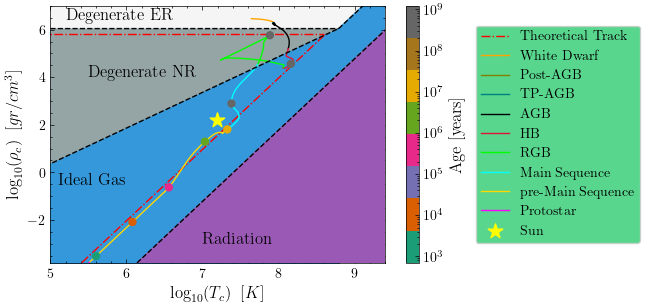

In [3]:

#%%

'''
The T_c-Rho_c plane
'''
rho_sun = 1.622e5 #kg/m^3
rho_sun /= 1e3    #gr/cm^3
rho_sun = np.log10(rho_sun)
T_sun = 1.57e7    #K
T_sun = np.log10(T_sun)

# print(T_sun,rho_sun)

T_core = history.log_center_T
T_core_markers = T_core[::45]

Rho_core = history.log_center_Rho
Rho_core_markers = Rho_core[::45]

age1 = history.star_age
age1_markers = age1[::45]
#%%


# Color array
colarr = ["#9b59b6", "#3498db", "#95a5a6"]#, "#e74c3c", "#34495e", "#2ecc71"]
# colarr = ['#3498DB', 
#               '#5DADE2', 
#               '#85C1E9']

rel_constant = np.log10(9.7e5 * mu_e) # where we go from NR to ER
    
    # Radiation Line T/ρ^1/3 = 3.2 10^7 μ
r_constant = 3.2e7
den_all = np.linspace(-5.5,8,num=200)
min_den = -5.5
rad_temprature = den_all*(1/3) + np.log10(r_constant) - (5/3) * np.log10(mu_e)

fig, ax = plt.subplots(figsize=reg_size)
ax.set_facecolor('whitesmoke')   
ax.plot(rad_temprature, den_all,
            c = 'k', linestyle='dashed',
             zorder=4)
  
ax.fill_between(rad_temprature, min_den, den_all, 
                    color=colarr[0],
                    zorder=2)

    
    # Ideal Line T/ρ^2/3 = 1.21 10^5 μ
ideal_constant = 1.21e5
den_ideal = np.linspace(-4,rel_constant,num=200)
    

ideal_temprature = den_ideal*(2/3) + np.log10(ideal_constant) + np.log10(mu) - (5/3) * np.log10(mu_e)
ax.plot(ideal_temprature, den_ideal,
             c = 'k', linestyle='dashed',
             zorder=3)    
ax.fill_between(ideal_temprature, min_den, den_ideal,
                    color=colarr[1],
                    zorder=1)
    
    # The kink
ideal_constant2 = 1.5e7
den_ideal2 = np.linspace(rel_constant, 8)
fudge = -0.095 # We need to fudge it because it jumps from NR to ER regime
                  # At some point it should be just R
ideal_temprature_2 = den_ideal2*(1/3) + np.log10(ideal_constant2) + np.log10(mu) - (4/3) * np.log10(mu_e) + fudge
ax.plot(ideal_temprature_2, den_ideal2,
             c = 'k', linestyle='dashed', zorder=3)   
ax.fill_between(ideal_temprature_2, min_den, den_ideal2, 
                    color=colarr[1],
                    zorder=1)
    # Rel line
log_temperature = T_core 
temp_test = np.linspace(5, ideal_temprature_2[0], num=len(log_temperature))
rel_density = np.add(np.zeros_like(log_temperature),rel_constant)
ax.plot(temp_test, rel_density,
               c='k', linestyle='dashed',
               zorder=3)
ax.fill_between(temp_test, min_den, rel_density,  
                    color=colarr[2],
                    zorder=0)
    
    # Theoretical evolution line p.115 (8.3)
C = 0.4 # 0.36 - 0.48 p.113
G = 6.6743e-8 # [dyn⋅cm2⋅g−2]
R = 8.31e7 # [ergs mol⁻¹K⁻¹]
M_sol = m * 1.9891e33 # [g]
theory_constant = C*G/R
T_theory = (1/3) * den_all + np.log10(mu * theory_constant) + (2/3) * np.log10(M_sol)
    
if m==1:
    stop_theory = 159
    ax.plot(T_theory[:stop_theory], den_all[:stop_theory], color='red', linestyle='dashdot')
            
    straight = np.add(np.zeros_like(T_theory[:stop_theory]),den_all[stop_theory])
    ax.plot(T_theory[:stop_theory], straight, color='red', linestyle='dashdot',label='Theoretical Track')
if m==2:
    stop_theory = 167
    ax.plot(T_theory[:stop_theory], den_all[:stop_theory], color='red', linestyle='dashdot')       
    straight = np.add(np.zeros_like(T_theory[:stop_theory]),den_all[stop_theory])
    ax.plot(T_theory[:stop_theory], straight, color='red', linestyle='dashdot',label='Theoretical Track')

# plt.plot(T_core,Rho_core)   
plt.plot(T_core[129*45-21:],Rho_core[129*45-21:],label='White Dwarf',color='orange')
plt.plot(T_core[108*45:129*45-21+1],Rho_core[108*45:129*45-21+1],label='Post-AGB',color='olive')
plt.plot(T_core[80*45:108*45+1],Rho_core[80*45:108*45+1],label='TP-AGB',color='teal')
plt.plot(T_core[38*45:80*45+1],Rho_core[38*45:80*45+1],label='AGB',color='black')
plt.plot(T_core[36*45:38*45+1],Rho_core[36*45:38*45+1],label='HB',color='crimson')
plt.plot(T_core[8*45+3:36*45+1],Rho_core[8*45+3:36*45+1],label='RGB',color='lime')
plt.plot(T_core[6*45:8*45+3+1],Rho_core[6*45:8*45+3+1],label='Main Sequence',color='cyan')
plt.plot(T_core[2*45-10:6*45+1],Rho_core[2*45-10:6*45+1],label='pre-Main Sequence',color='gold')
plt.plot(T_core[:2*45-10+1],Rho_core[:2*45-10+1],label='Protostar',color='magenta')

plt.scatter(T_sun,rho_sun,s=120,marker='*',color='yellow',label='Sun',zorder=1)
# plt.scatter(T_core[70*45],Rho_core[70*45],s=200)
# plot = plt.scatter(T_core_markers, Rho_core_markers,
#                    c=age1_markers, s =25, cmap='inferno', norm=colors.LogNorm(), zorder=1)
# plt.colorbar(plot)

skip = 7
plot1 = plt.scatter(T_core_markers[2:skip], Rho_core_markers[2:skip], c = age1_markers[2:skip], s = 25, 
                   cmap = 'Dark2', norm = colors.LogNorm(vmin=age1_markers[2], vmax=age1_markers[-1]), zorder=3)
plot2 = plt.scatter(T_core_markers[skip:52:15], Rho_core_markers[skip:52:15], c = age1_markers[skip:52:15], s = 25, 
                   cmap = 'Dark2', norm = colors.LogNorm(vmin=age1_markers[2], vmax=age1_markers[-1]), zorder=3)

cbar = plt.colorbar(plot1)#,location='left')
cbar.set_label('Age [years]')
# for i in range(1, len(T_core)-1):
#     plt.plot(T_core[i-1:i+1], Rho_core[i-1:i+1],
#              c=plot.to_rgba(age1[i]), zorder=2)
# plt.plot(T_core[len(T_core)-2:len(T_core)], Rho_core[len(Rho_core)-2:len(Rho_core)], c=plot.to_rgba(age1[i]), zorder=2)

ax.text(5.1,-.5,'Ideal Gas')
ax.text(7.0,-3,'Radiation')
ax.text(5.5,4,'Degenerate NR')
ax.text(5.2,6.4,'Degenerate ER')

legend = plt.legend(bbox_to_anchor=(1.25, .95),frameon=True)
legend.get_frame().set_facecolor('#2ecc71')
ax.set_xlim(5,9.4)
ax.set_ylim(-3.8,7)
plt.xlabel(r'$\log_{10}(T_c) \;\; [K]$')
plt.ylabel(r'$\log_{10}(\rho_c) \;\; [gr/cm^3]$')
plt.savefig(f'plots/loglog_{m}.pdf',bbox_inches = 'tight')
plt.show()



#   maybe cool -> spring for 2  colormaps
#%%


In [4]:
len(age1_markers)

131

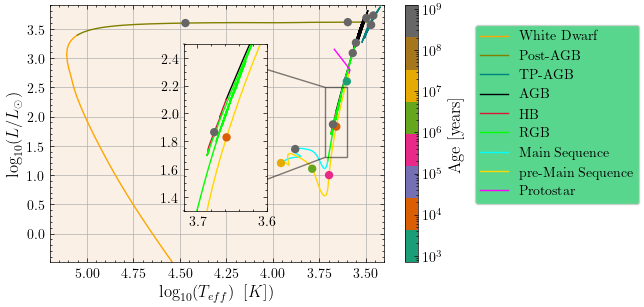

In [5]:
'''
The HR diagram
'''

L = history.log_L[:]
L_markers = L[::45]

T_eff = history.log_Teff[:]
T_eff_markers = T_eff[::45]

age2 = history.star_age[:]
age2_markers = age2[::45]
#%%
fig, ax = plt.subplots(figsize=reg_size)
ax.set_facecolor('linen')
# ["#9b59b6", "#3498db", "#95a5a6"]#, "#e74c3c", "#34495e", "#2ecc71"]

skip = 7
plot1 = plt.scatter(T_eff_markers[2:skip], L_markers[2:skip], c = age2_markers[2:skip], s = 25, 
                   cmap = 'Dark2', norm = colors.LogNorm(vmin=age2_markers[2], vmax=age2_markers[-1]), zorder=3)
plot2 = plt.scatter(T_eff_markers[skip::15], L_markers[skip::15], c = age2_markers[skip::15], s = 25, 
                   cmap = 'Dark2', norm = colors.LogNorm(vmin=age2_markers[2], vmax=age2_markers[-1]), zorder=3)

cbar = plt.colorbar(plot1)#,location='left')
cbar.set_label('Age [years]')

# plot1 = plt.scatter(-T_eff_markers[:skip], L_markers[:skip], c = age2_markers[:skip], s = 25, 
#                    cmap = 'cool', norm = colors.LogNorm(), zorder=3)
# plot2 = plt.scatter(-T_eff_markers[skip:], L_markers[skip:], c = age2_markers[skip:], s = 25, 
#                    cmap = 'spring', norm = colors.LogNorm(), zorder=3)
# plt.colorbar(plot2)
# plt.colorbar(plot1)#,location='left')


plt.plot(T_eff[129*45-21:],L[129*45-21:],label='White Dwarf',color='orange')
plt.plot(T_eff[108*45:129*45-21+1],L[108*45:129*45-21+1],label='Post-AGB',color='olive')
plt.plot(T_eff[80*45:108*45+1],L[80*45:108*45+1],label='TP-AGB',color='teal')
plt.plot(T_eff[38*45:80*45+1],L[38*45:80*45+1],label='AGB',color='black')
plt.plot(T_eff[36*45:38*45+1],L[36*45:38*45+1],label='HB',color='crimson')
plt.plot(T_eff[8*45+3:36*45+1],L[8*45+3:36*45+1],label='RGB',color='lime')
plt.plot(T_eff[6*45:8*45+3+1],L[6*45:8*45+3+1],label='Main Sequence',color='cyan')
plt.plot(T_eff[2*45-10:6*45+1],L[2*45-10:6*45+1],label='pre-Main Sequence',color='gold')
plt.plot(T_eff[:2*45-10+1],L[:2*45-10+1],label='Protostar',color='magenta')

axins = ax.inset_axes([.40, .20, 0.25, .65])
axins.set_facecolor('linen')
axins.plot(T_eff[129*45-21:],L[129*45-21:],label='White Dwarf',color='orange')
axins.plot(T_eff[108*45:129*45-21+1],L[108*45:129*45-21+1],label='Post-AGB',color='olive')
axins.plot(T_eff[80*45:108*45+1],L[80*45:108*45+1],label='TP-AGB',color='teal')
axins.plot(T_eff[38*45:80*45+1],L[38*45:80*45+1],label='AGB',color='black')
axins.plot(T_eff[36*45:38*45+1],L[36*45:38*45+1],label='HB',color='crimson')
axins.plot(T_eff[8*45+3:36*45+1],L[8*45+3:36*45+1],label='RGB',color='lime')
axins.plot(T_eff[6*45:8*45+3+1],L[6*45:8*45+3+1],label='Main Sequence',color='cyan')
axins.plot(T_eff[2*45-10:6*45+1],L[2*45-10:6*45+1],label='pre-Main Sequence',color='gold')
axins.plot(T_eff[:2*45-10+1],L[:2*45-10+1],label='Protostar',color='magenta')
axins.scatter(T_eff_markers[2:skip], L_markers[2:skip], c = age2_markers[2:skip], s = 25, 
                   cmap = 'Dark2', norm = colors.LogNorm(vmin=age2_markers[2], vmax=age2_markers[-1]), zorder=3)
axins.scatter(T_eff_markers[skip::15], L_markers[skip::15], c = age2_markers[skip::15], s = 25, 
                   cmap = 'Dark2', norm = colors.LogNorm(vmin=age2_markers[2], vmax=age2_markers[-1]), zorder=3)

axins.set_xlim(3.72,3.60)
axins.set_ylim(1.3,2.5)
ax.indicate_inset_zoom(axins, edgecolor="black")

# plt.scatter(-T_eff[int(skip*50):], L[skip*50:],c=plot2.to_rgba(age2[skip*50:]), zorder=2,marker='.',s=.5)
# plt.scatter(-T_eff[:int(skip*50)], L[:skip*50],c=plot1.to_rgba(age2[:skip*50]), zorder=2,marker='.',s=.5)

# plt.plot(T_eff[len(T_eff)-2:len(T_eff)], L[len(L)-2:len(L)], c=plot.to_rgba(age2[i]), zorder=2)
# ax.set_xlim(-5.1,-3.4)
ax.set_xlim(5.2,3.4)
# ax.set_xlim(3.75,3.5)
ax.set_ylim(-0.49,3.9)

plt.xlabel(r'$\log_{10}(T_{eff}) \;\; [K])$')
plt.ylabel(r'$\log_{10}(L/L_{\odot})$')
plt.grid()
# plt.legend()
legend = plt.legend(bbox_to_anchor=(1.25, .95),frameon=True)
legend.get_frame().set_facecolor('#2ecc71')
plt.savefig(f'plots/HR_{m}.pdf',bbox_inches = 'tight')
plt.show()


In [6]:
L[76*45]

3.7313566485052103

In [7]:
L_markers[76]

3.7313566485052103

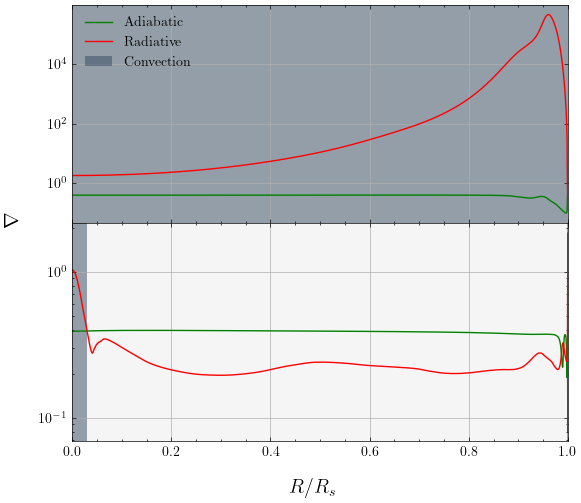

In [8]:
# Pre-main sequence. We will go for the forth profile
PMS = logs.profile_data(profile_number=4)
PMSadiabatic_grad = PMS.grada
PMSlog_ad_grad = np.log10(PMSadiabatic_grad)

PMSradiation_grad = PMS.gradr
PMSlog_rad_grad = np.log10(PMSradiation_grad)

PMSr= PMS.radius
PMSlog_r = np.log10(PMSr)

# Main sequence. We will go for the sixth profile
MS = logs.profile_data(profile_number=9)
MSadiabatic_grad = MS.grada
MSlog_ad_grad = np.log10(MSadiabatic_grad)

MSradiation_grad = MS.gradr
MSlog_rad_grad = np.log10(MSradiation_grad)

MSr= MS.radius
MSlog_r = np.log10(MSr)



fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(sub_size[0]+1,sub_size[1]-1))

    

fig.subplots_adjust(hspace=0)

ax1.set_facecolor('whitesmoke')
# ax1.plot(PMSlog_r/PMSlog_r[0], PMSlog_ad_grad)
# ax1.plot(PMSlog_r/PMSlog_r[0], PMSlog_rad_grad)

ax1.plot(PMSr/PMSr[0], PMSadiabatic_grad,color='green',label='Adiabatic')
ax1.plot(PMSr/PMSr[0], PMSradiation_grad,color='red',label='Radiative')


ax2.set_facecolor('whitesmoke')
# ax2.plot(MSlog_r/MSlog_r[0], MSlog_ad_grad)
# ax2.plot(MSlog_r/MSlog_r[0], MSlog_rad_grad)
ax2.plot(MSr/MSr[0], MSadiabatic_grad,color='green')
ax2.plot(MSr/MSr[0], MSradiation_grad,color='red')

if m==1:
    ax1.axvspan(0, 0.99926303, facecolor='#34495e', alpha=0.5,label='Convection')
    ax2.axvspan(7.18550154e-01,1, facecolor='#34495e', alpha=0.5,label='Convection')
if m==2:
    ax1.axvspan(0, 0.99944332, facecolor='#34495e', alpha=0.5,label='Convection')
    ax2.axvspan(0,0.0301823, facecolor='#34495e', alpha=0.5,label='Convection')    
    ax2.axvspan(0.99779804,1, facecolor='#34495e', alpha=0.5,label='Convection')
    
# plt.xscale('log')
ax1.grid()
ax2.grid()
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlim(0.0,1)
# ax1.set_ylim(-1.6, 6)
# ax2.set_ylim(-1, 3.3)
# plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
ax1.legend()
fig.supylabel(r'$\nabla$')
fig.supxlabel(r'$R/R_s$')
plt.savefig(f'plots/gradients_{m}.pdf',bbox_inches = 'tight')
plt.show()



In [9]:
PMSr[PMSadiabatic_grad > PMSradiation_grad]/PMSr[0]

array([1.        , 0.99999998, 0.99999995, 0.99999992, 0.99999986,
       0.99999975, 0.99999965, 0.99999944, 0.99999923, 0.99999888,
       0.99999853, 0.99999796, 0.99999738, 0.99999616, 0.99999495,
       0.99999228, 0.99998962, 0.99998541, 0.99998123, 0.99997409,
       0.99996702, 0.99995652, 0.99994615, 0.99992913, 0.99989069,
       0.99982845, 0.99971547, 0.99966477, 0.99961649, 0.99957033,
       0.99952604, 0.99944332])

In [10]:
MSr[MSadiabatic_grad < MSradiation_grad]/MSr[0]

array([1.00000000e+00, 9.99995471e-01, 9.99985031e-01, 9.99974825e-01,
       9.99959564e-01, 9.99924033e-01, 9.99874257e-01, 9.99834052e-01,
       9.99774286e-01, 9.99720685e-01, 9.99688901e-01, 9.99654201e-01,
       9.99612929e-01, 9.99570799e-01, 9.99528507e-01, 9.99486414e-01,
       9.99444405e-01, 9.99402911e-01, 9.99361997e-01, 9.99321697e-01,
       9.99286731e-01, 9.99252257e-01, 9.99217701e-01, 9.99183646e-01,
       9.99127973e-01, 9.99100638e-01, 9.99073628e-01, 9.99046936e-01,
       9.99020554e-01, 9.98994476e-01, 9.98968696e-01, 9.98928050e-01,
       9.98888121e-01, 9.98858630e-01, 9.98829518e-01, 9.98800774e-01,
       9.98772390e-01, 9.98716660e-01, 9.98662258e-01, 9.98546922e-01,
       9.98473113e-01, 9.98384029e-01, 9.98281415e-01, 9.98199181e-01,
       9.98042766e-01, 9.97881653e-01, 9.91581964e-01, 9.91367555e-01,
       9.91190352e-01, 9.91018669e-01, 9.90690140e-01, 9.90378950e-01,
       9.90179984e-01, 9.89892933e-01, 9.89708537e-01, 9.89354817e-01,
      

In [11]:
MSadiabatic_grad < MSradiation_grad

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [12]:
len(MSr)

740